
# Project: Investigation of the IMDB-Movies Dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will be analyzing data about movies from the IMDB website (https://www.themoviedb.org/). We will be interested in finding trends related to the revenue of movies and what could affect it. Then we are going to take a look at the runtime of the movies and how it changed from year to year. 

Each row of the data set contains a movie entry and the columns include properties of that movie, like: homepage, id, original_title, overview, popularity, release_date...etc.

In this report I will explore the following questions:
1. What kinds of properties are associated with movies that have high revenues?
2. Which genres are most popular from year to year?

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
#Normalizing the font sizes for the plots throughout the notebook
small = 14
meduim = 16
large = 18
plt.rc('font', size=small)          # controls default text sizes
plt.rc('axes', titlesize=small)     # fontsize of the axes title
plt.rc('axes', labelsize=meduim)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small)    # fontsize of the tick labels
plt.rc('legend', fontsize=small)    # legend fontsize
plt.rc('figure', titlesize=large)   # fontsize of the figure title
color = 'white' 
#Change the color of text in the plot according to your prefrence, 
#I had a dark theme on my notebook, so I set it to 'white'

<a id='wrangling'></a>
## Data Wrangling

In [12]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
print(f'The original TMDB-Movies data set contains {df.shape[0]} data entries (rows) and {df.shape[1]} data features (columns).')

The original TMDB-Movies data set contains 10866 data entries (rows) and 21 data features (columns).


In [14]:
#Here we can see the features (columns) contained in the data set.
print('Data features (Columns) are: ')
list(df.columns)

Data features (Columns) are: 


['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [15]:
print('Information about the data: \n')
df.info()

Information about the data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   ob

The above cell shows infromation (index, name, number of nun-null values, data type and number of occurance of each data type) about each column of the data set

In [16]:
print('Description about the data in the data set.')
df.describe()

Description about the data in the data set.


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The above cell give us insight about some columns in the data set.

In [17]:
print('Are there any missing (null) data in the data set ?')
if df.isnull().sum().any():
    print('Yes')
else:
    print('No')

Are there any missing (null) data in the data set ?
Yes


In [18]:
print(f'There are a total of {df.isnull().any().sum()} columns contain null data and a total number of {df.isnull().sum().sum()} null data.')

There are a total of 9 columns contain null data and a total number of 13434 null data.


In [19]:
print('Number of null values in each column:')
df.isnull().sum()

Number of null values in each column:


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [20]:
print('Are there any duplicated data in the data set ?')
if df.duplicated().sum().any():
    print('Yes')
else:
    print('No')

Are there any duplicated data in the data set ?
Yes


In [21]:
print(f'There are a total of {df.duplicated().any().sum()} duplicates in the data set.')

There are a total of 1 duplicates in the data set.


In [22]:
print(f'There are movies directed by {len(df.director.unique())} directors included in the data set.')

There are movies directed by 5068 directors included in the data set.


In [23]:
print(f'The data set contains movies from {len(df.release_year.unique())} years, from {df.release_year.unique().min()} to {df.release_year.unique().max()}.\n')

The data set contains movies from 56 years, from 1960 to 2015.



In [24]:
print(f'with distribution of: \n{df.release_year.value_counts(sort=False, ascending=False)}')

with distribution of: 
1960     32
1968     39
1976     47
1984    105
1992    133
2000    227
2008    496
1961     31
1969     31
1977     57
1985    109
1993    178
2001    242
2009    533
1962     32
1970     41
1978     65
1986    121
1994    184
2002    266
2010    490
1963     34
1971     55
1979     57
1987    125
1995    175
2003    281
2011    540
1964     42
1972     40
1980     78
1988    145
1996    204
2004    307
2012    588
1965     35
1973     55
1981     82
1989    137
1997    192
2005    364
2013    659
1966     46
1974     47
1982     81
1990    132
1998    210
2006    408
2014    700
1967     40
1975     44
1983     80
1991    133
1999    224
2007    438
2015    629
Name: release_year, dtype: int64


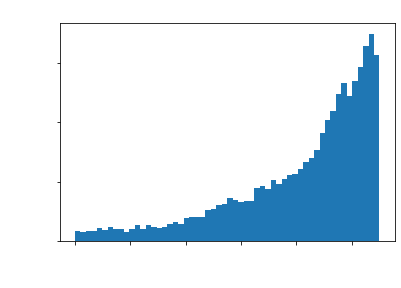

In [25]:
defrange = (df.release_year.unique().min(), df.release_year.unique().max())
plt.hist(df.release_year, bins = len(df.release_year.unique()), range= defrange);
plt.title('Distribution of release years in the data set.',color=color);
plt.xlabel('Years', color=color)
plt.ylabel('Count',color=color);
plt.xticks(color=color);
plt.yticks(color=color);

As we can see from the above plot, number of movies increase exponentially throughout the years.

In [26]:
#Getting a list of years for later use
years = sorted(df.release_year.unique().tolist())

### Data Cleaning

First we will drop some unnecessary columns (imdb_id, homepage, tagline, keywords, overview, production_companies, release_date, budget_adj, revenue_adj), a total of 9 columns.

In [27]:
dropped_column = ['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj']
df.drop(dropped_column, axis = 1, inplace=True)

In [28]:
#Check the data after dropping the unnecessary columns
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


In [29]:
print(f'Now the data contains {df.shape[0]} rows and {df.shape[1]} columns.')

Now the data contains 10866 rows and 12 columns.


After dropping the unnecessary columns, we recheck for null values.

In [30]:
print('Are there any missing (null) data in the data set ?')
if df.isnull().sum().any():
    print('Yes')
else:
    print('No')

Are there any missing (null) data in the data set ?
Yes


In [31]:
print(f'There are a total of {df.isnull().any().sum()} columns contain null data.')

There are a total of 3 columns contain null data.


In [32]:
print('Number of null values in each column:')
df.isnull().sum()

Number of null values in each column:


id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [33]:
print(f'And a total number of {df.isnull().sum().sum()} null values.')

And a total number of 143 null values.


Since the number of null valus is low (143) compared to the whole data set (10866), we can remove the null values.

In [34]:
df.dropna(inplace = True)

Final check of null values.

In [35]:
print('Are there any missing (null) data in the data set ?')
if df.isnull().sum().any():
    print('Yes')
else:
    print('No')

Are there any missing (null) data in the data set ?
No


In [36]:
#Recheck the data after dropping the null values
print(f'Now the data set contains {df.shape[0]} rows and {len(df.columns)} columns with no missing values.\n')

df.info()

Now the data set contains 10732 rows and 12 columns with no missing values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10732 non-null  int64  
 1   popularity      10732 non-null  float64
 2   budget          10732 non-null  int64  
 3   revenue         10732 non-null  int64  
 4   original_title  10732 non-null  object 
 5   cast            10732 non-null  object 
 6   director        10732 non-null  object 
 7   runtime         10732 non-null  int64  
 8   genres          10732 non-null  object 
 9   vote_count      10732 non-null  int64  
 10  vote_average    10732 non-null  float64
 11  release_year    10732 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


Then we can remove the duplicated data and check if there are any duplicates exist.

In [37]:
df.drop_duplicates(inplace=True)

Recheck for duplicated values.

In [38]:
print('Are there any duplicated data in the data set ?')
if df.duplicated().sum().any():
    print('Yes')
else:
    print('No')

Are there any duplicated data in the data set ?
No


In [39]:
#Recheck the data after dropping the duplicated values
print(f'Now the data set contains {df.shape[0]} rows and {len(df.columns)} columns with no missing values.\n')

df.info()

Now the data set contains 10731 rows and 12 columns with no missing values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int64  
 3   revenue         10731 non-null  int64  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int64  
 8   genres          10731 non-null  object 
 9   vote_count      10731 non-null  int64  
 10  vote_average    10731 non-null  float64
 11  release_year    10731 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


The above cell shows infromation (index, name, number of nun-null values, data type and number of occurance of each data type) about each column of the data set after cleaning.

A look at the dataset after cleaning.

In [40]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


In [41]:
#Creating a duplicate data set to separate the genre column
df_with_genres = df.copy(deep=True)
df_with_genres.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


In [42]:
df_with_genres.set_index('id', inplace=True)

In [43]:
df_with_genres.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
id,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


In [44]:
#Splitting the multiple genres entries into separate columns.
genres_df = df_with_genres['genres'].str.split("|", expand=True)

In [45]:
# Verifying successful separation 
genres_df.head()

,0,1,2,3,4
id,,,,,
135397,Action,Adventure,Science Fiction,Thriller,None
76341,Action,Adventure,Science Fiction,Thriller,None
262500,Adventure,Science Fiction,Thriller,None,None
140607,Action,Adventure,Science Fiction,Fantasy,None
168259,Action,Crime,Thriller,None,None


In [46]:
# Creating a separate dataframe form unique genres records.
genres_df = genres_df.stack()

genres_df = pd.DataFrame(genres_df)
genres_df.head()

0
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

In [47]:
#Renaming the genres column
genres_df.rename(columns={0:'genres_adj'}, inplace=True)

In [48]:
genres_df.head()

genres_adj
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

In [49]:
#Merge the data set (df) with the genres dataframe (genres_df)
df_with_genres = pd.merge(df_with_genres, genres_df, on='id')

In [50]:
#We can now drop the original genres column
df.drop('genres',axis = 1, inplace=True)

A look at the new data set with genres splitted

In [51]:
df_with_genres.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,genres_adj
id,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,Action
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,Adventure
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,Science Fiction
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,Thriller
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,Action


In [52]:
print(f'The data set contains a total of {len(df_with_genres.genres_adj.unique())} genres.')
print(f'These genres are: \n{df_with_genres.genres_adj.unique()}')

The data set contains a total of 20 genres.
These genres are: 
['Action' 'Adventure' 'Science Fiction' 'Thriller' 'Fantasy' 'Crime'
 'Western' 'Drama' 'Family' 'Animation' 'Comedy' 'Mystery' 'Romance' 'War'
 'History' 'Music' 'Horror' 'Documentary' 'TV Movie' 'Foreign']


In [53]:
#Genres value count
df_with_genres.genres_adj.value_counts()

Drama              4746
Comedy             3775
Thriller           2902
Action             2376
Romance            1708
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
Name: genres_adj, dtype: int64

The above cell shows us number of occurance of each genre in the data set.

In [54]:
#Getting all the genres and sorting them in a list for later use
genres = sorted(df_with_genres['genres_adj'].unique().tolist(), key=str.casefold)

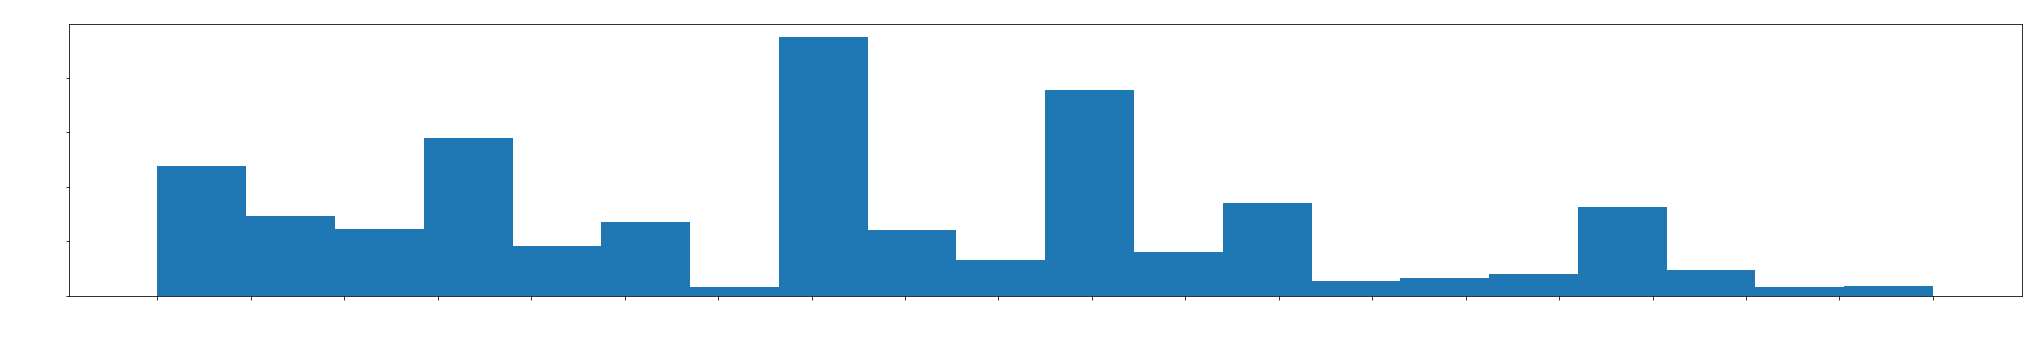

In [55]:
plt.figure(figsize=(35, 5))
plt.hist(df_with_genres.genres_adj , bins = len(df_with_genres.genres_adj.unique()));
plt.title('Distribution of genres.',color=color);
plt.xlabel('Genres', color=color)
plt.ylabel('Count',color=color);
plt.xticks(color=color);
plt.yticks(color=color);

Here we can see the frequency of occurance of each genre in the data set, clearly the Drama genre is the highest in occurance.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What kinds of properties are associated with movies that have high revenues?)

First we get the correlation of the dataset.

In [47]:
df['revenue'].describe()

count    1.073100e+04
mean     4.031989e+07
std      1.176524e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.500000e+07
max      2.781506e+09
Name: revenue, dtype: float64

Then we get the correlation of the dataset.

In [48]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
id,1.000000,-0.009464,-0.138935,-0.097424,-0.083996,-0.032767,-0.071896,0.510385
popularity,-0.009464,1.000000,0.544240,0.662843,0.138278,0.800619,0.217906,0.093044
budget,-0.138935,0.544240,1.000000,0.734487,0.192168,0.632074,0.087318,0.119004
revenue,-0.097424,0.662843,0.734487,1.000000,0.164276,0.790889,0.178477,0.059072
runtime,-0.083996,0.138278,0.192168,0.164276,1.000000,0.164966,0.177276,-0.119286
vote_count,-0.032767,0.800619,0.632074,0.790889,0.164966,1.000000,0.260554,0.110317
vote_average,-0.071896,0.217906,0.087318,0.178477,0.177276,0.260554,1.000000,-0.127746
release_year,0.510385,0.093044,0.119004,0.059072,-0.119286,0.110317,-0.127746,1.000000


From the correlation table we can determine that the popularity, budget and vote_count has the highest correlation with the revenue.

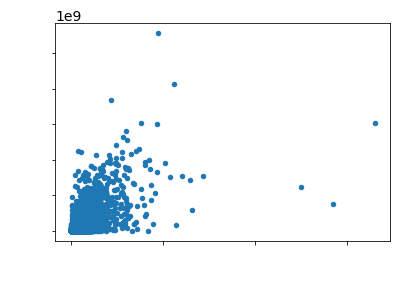

In [49]:
df.plot.scatter(x = 'popularity', y = 'revenue')
plt.title('Popularity vs Revenue',color=color);
plt.xlabel('Popularity', color=color)
plt.ylabel('Revenue',color=color);
plt.xticks(color=color);
plt.yticks(color=color);

The above plot shows us the relation between the Popularity and Revenue columns. 

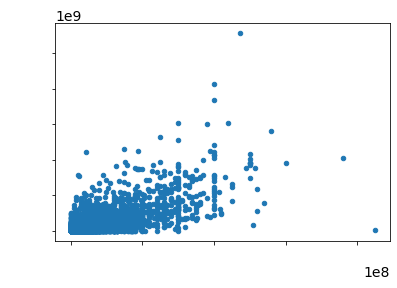

In [50]:
df.plot.scatter(x = 'budget', y = 'revenue')
plt.title('Budget vs Revenue',color=color);
plt.xlabel('Budget', color=color)
plt.ylabel('Revenue',color=color);
plt.xticks(color=color);
plt.yticks(color=color);

The above plot shows us the relation between the Budget and Revenue columns. 

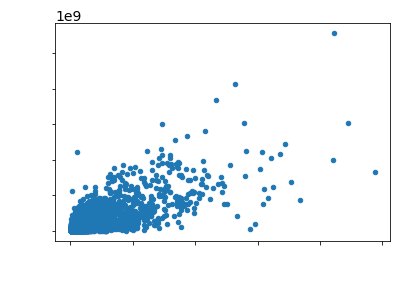

In [51]:
df.plot.scatter(x = 'vote_count', y = 'revenue')
plt.title('Vote_Count vs Revenue',color=color);
plt.xlabel('Vote_Count', color=color)
plt.ylabel('Revenue',color=color);
plt.xticks(color=color);
plt.yticks(color=color);

The above plot shows us the relation between the Vote_Count and Revenue columns. 

Now we will assess the effect of genre type on the revenue.

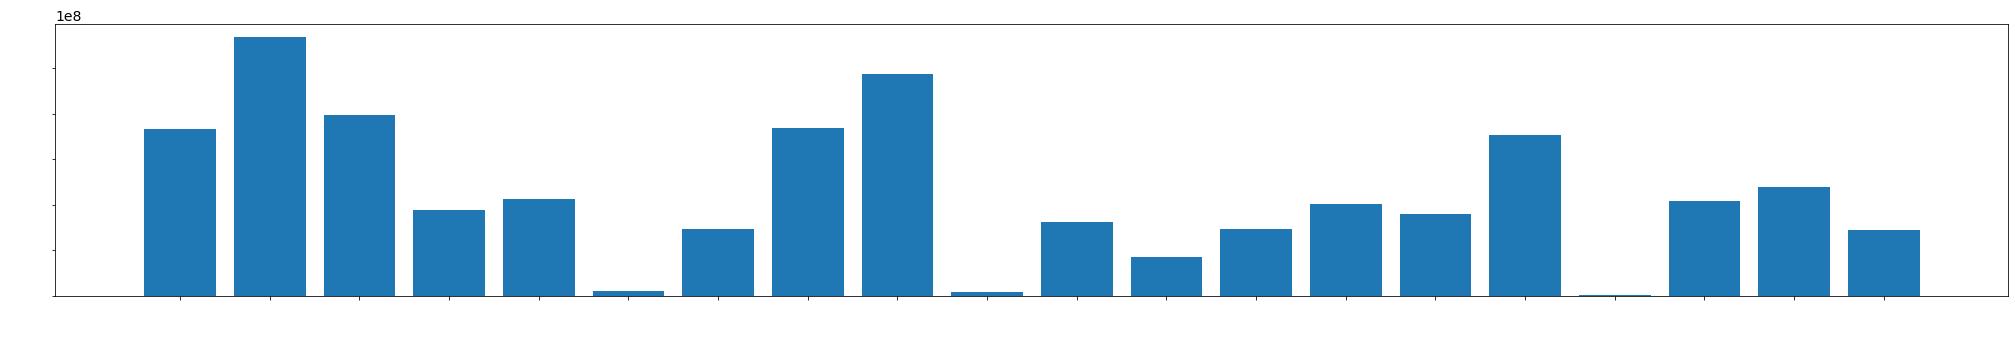

In [52]:
plt.figure(figsize=(35, 5))
plt.bar(genres, df_with_genres.groupby('genres_adj')['revenue'].mean())
plt.title('Genres vs Mean Revenue.',color=color);
plt.xlabel('Genres', color=color)
plt.ylabel('Mean Revnue',color=color);
plt.xticks(color=color);
plt.yticks(color=color);

From the above bas plot, we can see that the highest revenue comes from Adventure genre, while Thriller has the lowest revenue.

### Research Question 2  (Which genres are most popular from year to year?)

In [2]:
#Making a function that takes a dataframe and produce a dictionary
def dftodict(df):
    #Make a duplicate dataset to manipulate it freely
    df_ofyears = df.copy() 
    #Using the years column as an index and sorting the dataset by years
    df_ofyears.sort_values(by='release_year', inplace=True)
    df_ofyears.set_index(keys=['release_year'], drop=False,inplace=True)
    #Dropping unrelated columns
    df_ofyears.drop(['popularity','id', 'budget', 'revenue', 'original_title', 'cast', 'director','vote_count', 'vote_average', 'release_year'], axis = 1 , inplace=True)
    #Creating a dictionary from the dataframe for easier processing
    df_ofyears_dict = dict(tuple(df_ofyears.groupby('release_year')))
    return df_ofyears_dict

In [59]:
#Using the df to dict function
df_ofyears_dict = dftodict(df)

In [57]:
#Checking the dictionary
df_ofyears_dict

{1960:               runtime
 release_year         
 1960              104
 1960               85
 1960               70
 1960              167
 1960               97
 1960              128
 1960               97
 1960              146
 1960               86
 1960               77
 1960               72
 1960               85
 1960               91
 1960              208
 1960              109
 1960              128
 1960               76
 1960              125
 1960               79
 1960               89
 1960              111
 1960              197
 1960              101
 1960              134
 1960              110
 1960              125
 1960              127
 1960              126
 1960              101
 1960              103
 1960              114
 1960               73,
 1961:               runtime
 release_year         
 1961              124
 1961              128
 1961               79
 1961              110
 1961              152
 1961              158
 1961               8

In [58]:
#looping over the dictionary, getting the mean runtime of every year and putting the values in a list
mean_runtime = []
for r in range(1960,2016):
  mean_runtime.append(df_ofyears_dict[r].mean())

In [62]:
#Checking the list
mean_runtime

[runtime    110.65625
 dtype: float64,
 runtime    119.419355
 dtype: float64,
 runtime    124.34375
 dtype: float64,
 runtime    111.323529
 dtype: float64,
 runtime    109.214286
 dtype: float64,
 runtime    118.171429
 dtype: float64,
 runtime    106.891304
 dtype: float64,
 runtime    108.921053
 dtype: float64,
 runtime    109.947368
 dtype: float64,
 runtime    110.066667
 dtype: float64,
 runtime    113.075
 dtype: float64,
 runtime    107.727273
 dtype: float64,
 runtime    101.95
 dtype: float64,
 runtime    103.527273
 dtype: float64,
 runtime    107.804348
 dtype: float64,
 runtime    107.363636
 dtype: float64,
 runtime    109.319149
 dtype: float64,
 runtime    108.160714
 dtype: float64,
 runtime    110.076923
 dtype: float64,
 runtime    112.017544
 dtype: float64,
 runtime    107.5
 dtype: float64,
 runtime    105.865854
 dtype: float64,
 runtime    103.925926
 dtype: float64,
 runtime    103.0
 dtype: float64,
 runtime    104.442308
 dtype: float64,
 runtime    110.203

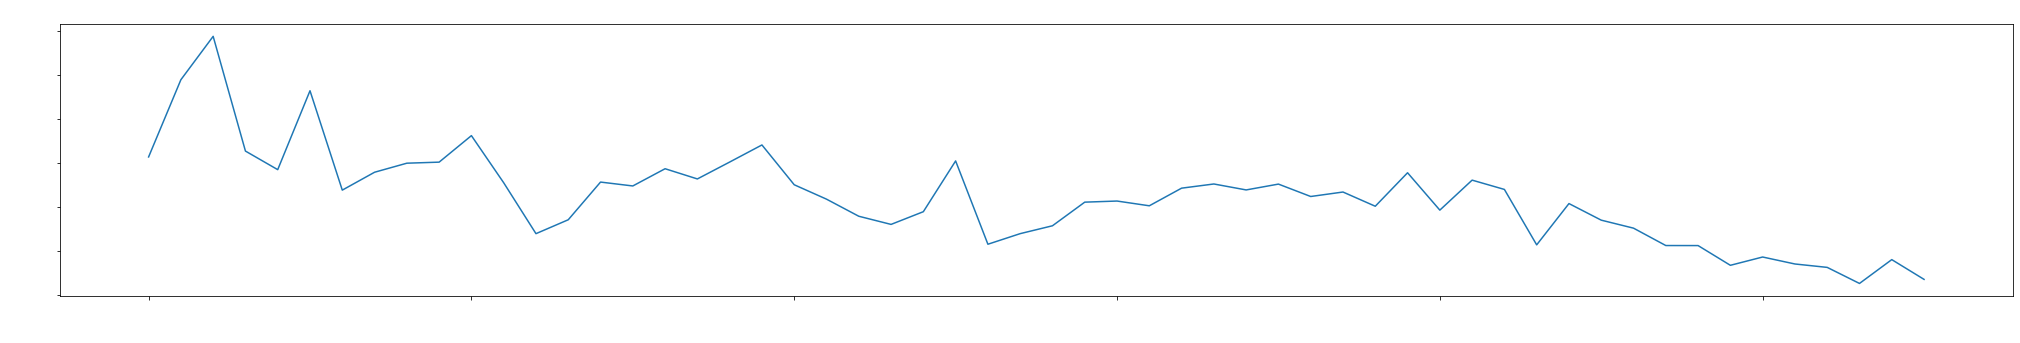

In [63]:
#Plotting the mean runtime list
plt.figure(figsize=(35, 5))
plt.plot(mean_runtime)
plt.title('Years vs Mean Runtime.',color=color);
plt.xlabel('Years', color=color)
plt.ylabel('Mean Runtime',color=color);
plt.xticks(ticks=None, color=color);
plt.yticks(color=color);

As we can see from this plot, the average runtime of the movies are decreasing year by year with slight fluctuations from one year to another.

<a id='conclusions'></a>
## Conclusions

Question 1: What kinds of properties are associated with movies that have high revenues?:
* Movies with higher budgets have shown a corresponding increase in the revenues.
* Highest revenue comes from Adventure genre, while Thriller has the lowest revenue.

Question 2: Which genres are most popular from year to year?:
* Average runtime of the movies are decreasing year by year with slight fluctuations from one year to another.

### Limitaions

* We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.

* There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.
* Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed.